# Reading the Dataset

In [266]:
import pandas as pd
df=pd.read_csv('osi4.csv')

# Importing useful Libraries

In [232]:
import numpy as np

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and stuff

In [233]:
df.shape

(80, 7)

In [234]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,PageValues,SpecialDay
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.575000,20.500000,0.037500,1.500000,10.725000,1.812500,0.175000
std,1.914469,116.749434,0.248731,13.416408,14.844319,8.041182,0.382364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
max,12.000000,1006.000000,2.000000,120.000000,90.000000,54.000000,1.000000


In [235]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,PageValues,SpecialDay
0,0,0,0,0,1,0,0
1,0,0,0,0,2,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,2,0,0
4,0,0,0,0,10,0,0


In [236]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,PageValues,SpecialDay
75,0,0,0,0,16,0,0
76,10,1006,0,0,36,11,0
77,0,0,0,0,2,0,1
78,0,0,0,0,1,0,1
79,0,0,0,0,1,0,0


Text(0, 0.5, 'Count')

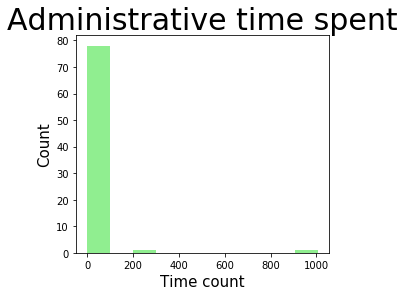

In [184]:
# visualizing the distribution of customers and time spent by them in Administrative area

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 2)
plt.hist(df['Administrative_Duration'], color = 'lightgreen')
plt.title('Administrative time spent',fontsize = 30)
plt.xlabel('Time count', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

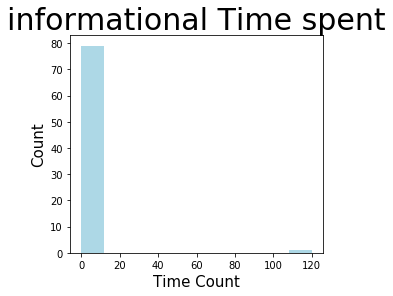

In [185]:
# visualizing the distribution of customers and time spent in Informational area

plt.subplot(1, 2, 2)
plt.hist(df['Informational_Duration'], color = 'lightblue')
plt.title('informational Time spent',fontsize = 30)
plt.xlabel('Time Count', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

# Perceptron 

In [237]:
import numpy as np
Xc=df.columns[0:]
X=df[Xc[1:6]].values
Y=df[Xc[6]].values
Y=Y.reshape(80,1)
print(X.shape)
print(Y.shape)
print(X[0:4])

(80, 5)
(80, 1)
[[0 0 0 1 0]
 [0 0 0 2 0]
 [0 0 0 1 0]
 [0 0 0 2 0]]


In [250]:
import numpy as np
import random
class Perceptron(object):
    def __init__(self,eta=0.01,n_iter=50):
        self.eta=eta # Learning rate (between 0.0 and 1.0)
        self.n_iter=n_iter  # Passes over the training dataset.
    def fit(self,X,y):  
        self.w_=np.random.random(1+X.shape[1])  
        for _ in range(self.n_iter):
            for xi, target in zip(X,y): 
                error=target-self.predict(xi)
                if error!=0:
                    update = self.eta * (target-self.predict(xi))
                    self.w_[1:] += update * xi
                    self.w_[0] += update*1
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0, 1, 0)
ob=Perceptron(eta=0.01,n_iter=50)
ob.fit(X,Y)
print(ob.w_)


sum=0
for i in X:
    sum=sum+ob.net_input(i)
#print(sum)
avg=sum/200
print(avg)
#print(ob.predict([0,0,0,1,0]))
#print(ob.predict([0,0,0,2,0]))
res=ob.predict(X)

[ 0.07818592 -4.88094925 -0.02158115 -0.45184543 -0.15593063  0.94507602]
-40.24770278992003


In [252]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(Y,res))

Accuracy:0.80


# SVM(Support Vector Machine)

In [254]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [255]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', C=1, random_state=0)
svm.fit(X_train, np.ravel(y_train,order='C'))
y_pred=svm.predict(X_test)
#print('misclassified samples: %d' %(y_test!=y_pred).sum())#compute

In [256]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

Accuracy:0.75


# LVQ

In [260]:
import numpy as np
import random
#x=np.array([[0,0,1,1],[1,1,0,0]])
##x=X_train
#W=np.array([[0.8,0.7,0.3,0.1,0.4],[0.1,0.3,0.2,0.1,0.1]])
#lr=0.6
#d=[0,0]
#e=1
##tar=y_train
def LVQ(x,tar):
    W=np.random.random((2,5))
    #W=np.array([[0.8,0.7,0.3,0.1,0.4],[0.1,0.3,0.2,0.1,0.1]])
    lr=0.6
    d=[0,0]
    e=1
    while(e<=10):
      for i in range(x.shape[0]):
        for j in range(W.shape[0]):
          d[j]=np.sum((x[i,:]-W[j,:])**2)
          d[j]=d[j]**0.6
        #print(d)
        if(d[0]<d[1]):
          t=0
          #print("winning neuron is ",0)
        else:
          t=1
          #print("winning neuron is", 1)
        if(t==tar[i]):
          W[t,:]+=lr*(x[i,:]-W[t,:])
        else:
           W[t,:]-=lr*(x[i,:]-W[t,:])
      print("Updated weight at epoch ",e,"are ",W)
      e+=1
      lr=0.5*lr
    return W

In [261]:
W=LVQ(X_train,y_train)

Updated weight at epoch  1 are  [[ 6.03509153e+02  1.77112513e-07  1.42610735e-09  2.28865682e+01
   6.57739964e+00]
 [-2.57089158e+02  5.66859005e+00  1.30824790e+01 -2.03843003e+02
   7.13747124e+00]]
Updated weight at epoch  2 are  [[ 1.33566085e+02  7.04198834e-04  2.06597961e-03  7.96686816e+00
   1.25463714e+00]
 [-5.64824881e+02  1.24538923e+01  2.87422063e+01 -4.50027078e+02
   1.56810243e+01]]
Updated weight at epoch  3 are  [[ 1.04298616e+02  1.51268151e-02  2.52232247e-01  8.94185140e+00
   1.04040072e+00]
 [-5.64824881e+02  1.24538923e+01  2.87422063e+01 -4.50027078e+02
   1.56810243e+01]]
Updated weight at epoch  4 are  [[ 6.82979964e+01  4.31926859e-02  1.22867822e+00  1.02015824e+01
   1.51191382e+00]
 [-5.64824881e+02  1.24538923e+01  2.87422063e+01 -4.50027078e+02
   1.56810243e+01]]
Updated weight at epoch  5 are  [[ 5.20959123e+01  5.85896460e-02  1.97085372e+00  1.08261493e+01
   1.90603151e+00]
 [-5.64824881e+02  1.24538923e+01  2.87422063e+01 -4.50027078e+02
   1.

In [262]:
#print(W)
def LVQt(X,Y,W):
    d=[0,0]
    res=np.zeros(Y.shape)
    for i in range(X.shape[0]):
        for j in range(W.shape[0]):
            d[j]=np.sum((X[i,:]-W[j,:])**2)
            d[j]=d[j]**0.6
        if d[0]<d[1]:
            res[i]=0
        elif d[0]==d[1]:
            res[i]=2
        else:
            res[i]=1
    return res
y_pred=LVQt(X_test,y_test,W)
#print(y_pred)
#print(y_test)
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))
print(y_pred)
print(y_test)

Accuracy:0.88
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]


# SOM

In [263]:
import numpy as np
#x=np.array([[0,0,1,1],[1,1,0,0]])
def SOM(x,y):
    #W=np.array([[0.8,0.7,0.3,0.1,0.4],[0.1,0.3,0.2,0.1,0.1]])
    W=np.random.random((2,5))
    lr=0.6
    d=[0,0]
    e=1
    res=np.zeros(y.shape)
    while(e<=3):
      for i in range(x.shape[0]):
        for j in range(W.shape[0]):
          d[j]=np.sum((x[i,:]-W[j,:])**2)
          d[j]=d[j]**0.6
        print(d)
        if(d[0]<d[1]):
          t=0
          res[i]=0
          print("winning neuron is ",0)
        else:
          t=1
          res[i]=1
          print("winning neuron is", 1)
        W[t,:]+=lr*(x[i,:]-W[t,:])
      print("Updated weight at epoch ",e,"are ",W)
      e+=1
      lr=0.5*lr
    return res

In [264]:
y_pred=SOM(X,Y)

[1.3355222629948384, 1.5596243408732988]
winning neuron is  0
[1.3802877456375056, 2.3824260278589198]
winning neuron is  0
[0.47874930891673917, 1.5596243408732988]
winning neuron is  0
[0.7645048855392459, 2.3824260278589198]
winning neuron is  0
[12.707348828966197, 15.219411352046233]
winning neuron is  0
[20.37255052577819, 33.425386116560155]
winning neuron is  0
[21.852075400735174, 1.5596243408732988]
winning neuron is 1
[23.873582898604457, 0.9228076434185452]
winning neuron is 1
[19.86129503234435, 1.8976563485235245]
winning neuron is 1
[17.903266197276796, 1.862385199217395]
winning neuron is 1
[17.903266197276796, 0.6202139084104875]
winning neuron is 1
[2.2025606920822116, 22.252489286964718]
winning neuron is  0
[12.54090788845689, 5.705694745804023]
winning neuron is 1
[14.391549588360203, 0.6600159949391458]
winning neuron is 1
[22.17062782601033, 4.833272313980893]
winning neuron is 1
[118.76076894227097, 126.54695391982985]
winning neuron is  0
[76.1507552999345, 2.9

In [265]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(Y,y_pred))

Accuracy:0.19
